Comparisons of locomotion predictions of different mechanistic latent variable models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_plot

# Basic comparison of linear vs dynamical-adapting single vs population fits.

In [2]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/lin_filter/rc_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt. (r-cos.)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
    fit_data = np.load(f'data/simple/mlv/lin_filter/rect_lin_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Lin. filt (rect)'
    r2 = fit_data['r2_test'].mean()
    err = fit_data['r2_test'].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))

In [3]:
labels = {'lin': 'Lin.', 'ln': 'LN', 'dyn': 'NLA'}
for nrl_mdl in ['lin', 'ln', 'dyn']:
    # load single ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_single_{nrl_mdl}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'].shape
        
        # median single variance explained
        key = f'{labels[nrl_mdl]} neur (avg)'
        
        idx_med = np.argsort(fit_data['r2s_test'].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][:, idx_med].mean()
        err = fit_data['r2s_test'][:, idx_med].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
        # best single variance explained
        key = f'{labels[nrl_mdl]} neur (best)'
        
        idx_best = fit_data['r2s_test'].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][:, idx_best].mean()
        err = fit_data['r2s_test'][:, idx_best].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]
        
        key = f'{labels[nrl_mdl]} neur pop.'
        
        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))

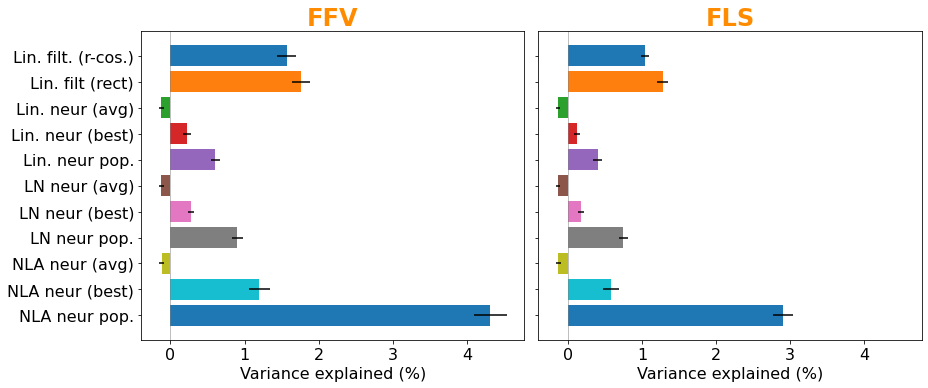

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(13, .5*len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Variance explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=24)

## Predictions of "best" behavioral variable FFV_MN_60 (FFV with one-minute forward smoothing)
And using only NM91 and ZH23 strains

In [5]:
KBEHAVS = ['FFV_MN_60', 'FLS_MN_60']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# get prediction from timestamp only
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/neur_basic/nm91_zh23_{kbehav.lower()}_from_time.npy', allow_pickle=True)[0]
    r2 = fit_data['r2_test'][kbehav].mean()
    nsplit = len(fit_data['r2_test'][kbehav])
    err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append(('Elapsed time', r2, err))

# purely linear fits
for kbehav in KBEHAVS:
    fit_data = np.load(f'data/simple/mlv/lin_filter/rc_lin_nm91_zh23_{kbehav.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]
    nsplit = len(fit_data['r2_test'])
    
    key = 'Linear filter'
    r2 = fit_data['r2_test'][kbehav].mean()
    err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)
    
    rslts[kbehav].append((key, r2, err))
    
labels = {'lin': 'Lin.', 'ln': 'L-N', 'dyn': 'M-A'}

for nrl_mdl in ['lin', 'ln', 'dyn']:
    # load single ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_single_{nrl_mdl}_nm91_zh23_{kbehav.lower()}.npy', allow_pickle=True)[0]
        nsplit, nr = fit_data['r2s_test'][kbehav].shape
        
        # median single variance explained
        key = f'Single {labels[nrl_mdl]} (avg)'
        
        idx_med = np.argsort(fit_data['r2s_test'][kbehav].mean(axis=0))[nr//2]  # arg-median
        r2 = fit_data['r2s_test'][kbehav][:, idx_med].mean()
        err = fit_data['r2s_test'][kbehav][:, idx_med].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
        # best single variance explained
        key = f'Single {labels[nrl_mdl]} (best)'
        
        idx_best = fit_data['r2s_test'][kbehav].mean(axis=0).argmax()
        r2 = fit_data['r2s_test'][kbehav][:, idx_best].mean()
        err = fit_data['r2s_test'][kbehav][:, idx_best].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))
        
    # load population ROI results
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_{nrl_mdl}_nm91_zh23_{kbehav.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]
        
        key = f'Population {labels[nrl_mdl]}'
        
        r2 = fit_data['r2_test'][kbehav].mean()
        nsplit = len(fit_data['r2_test'][kbehav])
        err = fit_data['r2_test'][kbehav].std()/np.sqrt(nsplit)
        
        rslts[kbehav].append((key, r2, err))

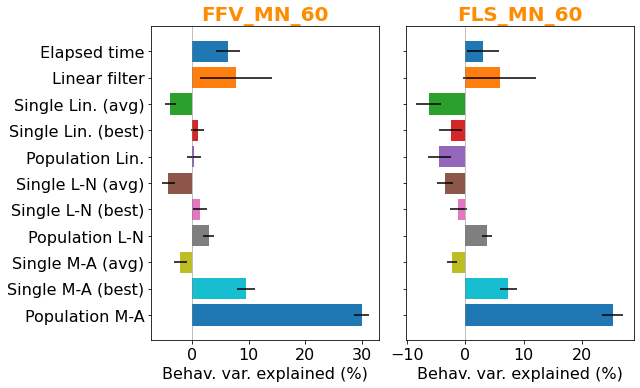

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9, .5*len(rslts[KBEHAVS[0]])), tight_layout=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Behav. var. explained (%)', font_size=16)
    ax.set_title(kbehav, color='darkorange', fontweight='bold', fontsize=20)
    
fig.savefig('cosyne_2022/ffv_fls_prediction_single_ppln.svg')

# Analysis of perturbed neural population predictions of female locomotion

In [101]:
# KBHVS = ['dyn', 'dyn_non_select', 'dyn_pure_select', 'dyn_sine_select', 'dyn_pulse_select', 'dyn_nonadapt', 'dyn_tau_const', ]
# KEYS = ['M-A population', 'Non-sel.', 'Pure sel.', 'Sine sel.', 'Pulse sel.', 'Nonadapting', r'Uniform $\tau_r, \tau_a$ ']
KBHVS = ['dyn', 'dyn_non_select', 'dyn_pure_select', 'dyn_nonadapt', 'dyn_tau_const', ]
KEYS = ['M-A population', 'No selectivity', 'Pure selectivity', 'Nonadapting', r'Uniform $\tau_r, \tau_a$ ']
FOLDERS = ['neur_basic'] + (len(KBHVS) - 1)*['dyn_alt']

rslts = []

for kbhv, folder, key in zip(KBHVS, FOLDERS, KEYS):
    fit_data = np.load(f'data/simple/mlv/{folder}/baker_{kbhv}_nm91_zh23_ffv_mn_60_ridge_alpha_10.npy', allow_pickle=True)[0]
    
    nsplit = len(fit_data['r2_test']['FFV_MN_60'])
    
    r2 = fit_data['r2_test']['FFV_MN_60'].mean()
    err = fit_data['r2_test']['FFV_MN_60'].std()/np.sqrt(nsplit)
    
    rslts.append((key, r2, err))

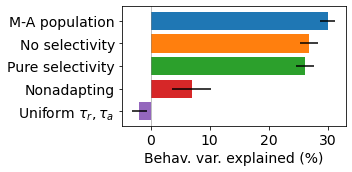

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(5, .5*len(rslts)), tight_layout=True, sharey=True)
for crslt, (key, r2, err) in enumerate(rslts):
    ax.barh([-crslt], [r2*100], xerr=[err*100])

ax.set_yticks(-np.arange(len(rslts)))
ax.set_yticklabels([rslt[0] for rslt in rslts])

ax.axvline(0, color='gray', lw=.5)
set_plot(ax, x_label='Behav. var. explained (%)', font_size=14)
    
fig.savefig('cosyne_2022/ffv_fls_prediction_alt_ppln.svg')

In [27]:
rslts

{'dyn': [('Full', 0.3002630781255739, 0.012795697305682302)],
 'dyn_nonadapt': [('Nonadapting', 0.06929560921986973, 0.03347745018939137)],
 'dyn_tau_const': [('Homogeneous\ntime constants',
   -0.019197791455364908,
   0.012376390633243082)],
 'dyn_non_select': [('Non-selective', 0.268024093058446, 0.01513289854669139)],
 'dyn_pure_select': [('Pure selectivity',
   0.2613942493233192,
   0.015412468145148307)]}

# Neural activity projected onto top PCs

In [9]:
KBEHAVS = ['FFV', 'FLS']

rslts = {kbehav: [] for kbehav in KBEHAVS}

# load population ROI results
for npc in [3, 10, 224]:
    for kbehav in KBEHAVS:
        fit_data = np.load(f'data/simple/mlv/neur_basic/baker_dyn_pca_npc_{npc}_{kbehav.lower()}_276_tr.npy', allow_pickle=True)[0]

        key = f'NLA neurons\n{npc} PCs'

        r2 = fit_data['r2_test'].mean()
        nsplit = len(fit_data['r2_test'])
        err = fit_data['r2_test'].std()/np.sqrt(nsplit)

        rslts[kbehav].append((key, r2, err))

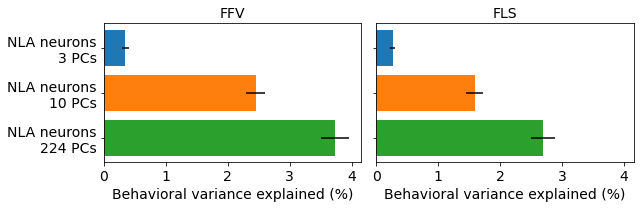

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, len(rslts[KBEHAVS[0]])), tight_layout=True, sharex=True, sharey=True)
for kbehav, ax in zip(KBEHAVS, axs):
    for crslt, (key, r2, err) in enumerate(rslts[kbehav]):
        ax.barh([-crslt], [r2*100], xerr=[err*100])
        
    if ax == axs[0]:
        ax.set_yticks(-np.arange(len(rslts[kbehav])))
        ax.set_yticklabels([rslt[0] for rslt in rslts[kbehav]])
        
    ax.axvline(0, color='gray', lw=.5)
    set_plot(ax, x_label='Behavioral variance explained (%)', title=kbehav, font_size=14)